## Inverting a Pendulum with Q-Learning

Required Imports

In [29]:
#All imports needed for this notebook to run
import numpy as np
import pendulum
import matplotlib.pyplot as plt

Getting Index of Discretization

In [30]:
#Function to get the index of the state in the discretized state array
def get_discretized_index(state):

    theta_arbitrary,omega_arbitrary = state[0],state[1]
    # we don't want 2pi to be in the set because it's the same as 0
    # we generate 50 equally spaced points for theta
    discretized_theta = np.linspace(0, 2*np.pi, 50, endpoint=False)

    # we generate 50 equally spaced points for omega
    discretized_omega = np.linspace(-6, 6, 50)

    # we can find the index of the closest element in the set of discretized states
    index_in_discretized_theta = np.argmin(np.abs((discretized_theta - theta_arbitrary)))
    index_in_discretized_omega = np.argmin(np.abs(discretized_omega - omega_arbitrary))

    # and find the closed discretized state
    closest_theta_state = discretized_theta[index_in_discretized_theta]
    closest_omega_state = discretized_omega[index_in_discretized_omega]

    return np.array([index_in_discretized_theta,index_in_discretized_omega])

In [31]:
def get_cost(x,u):
    '''
    Args:
    x - the current state of the system
    u - the current control action that is being applied
    '''
    cost = ((x[0]-np.pi)**2) +0.01*(x[1]**2) + 0.0001*(u**2)

    return cost

In [32]:
def get_policy_and_value_function(q_table):
    '''
    Args:
    q_table - a 3x50x50 np array

    Returns: 
    
    '''

    value_function = q_table.min(axis=2)
    policy = np.argmin(q_table, axis=2)

    return value_function, policy

In [33]:
def q_learning(q_table):

    epsilon = 0.1
    numEpisodes = 6000
    possibleU = [-4,0,4]
    learn_rate = 0.1
    discount_rate = 0.99 

    allCosts = []
    for episode in range(numEpisodes):

        #Initialise initial satte x0
        curr_x = np.array([0.,0.])
        cost_per_ep = 0
        
        for t in range(100):
            if (np.random.rand()<(epsilon)  and episode!=numEpisodes):
                # choose a random action
                idx_curr_action = np.random.randint(1,len(possibleU))
                currAction = possibleU[idx_curr_action] 
            else:
                #Best guess from q table 
                idx_curr_x = get_discretized_index(curr_x).astype(int)
                idx_curr_action = int(np.argmin(q_table[idx_curr_x[0],idx_curr_x[1],:], axis=0))
                currAction = possibleU[idx_curr_action] 

            #Oberserve x_n+1
            next_x = pendulum.get_next_state(curr_x,currAction) #Using the real state for getting next state (NOT discretized)
            idx_next_x = get_discretized_index(next_x).astype(int)
            idx_curr_x = get_discretized_index(curr_x).astype(int)

            #Update Q
            td_er = get_cost(next_x,currAction) + (discount_rate)*(q_table[idx_next_x[0],idx_next_x[1],:].min(axis=0)) - q_table[idx_curr_x[0],idx_curr_x[1],idx_curr_action]
            q_table[idx_curr_x[0],idx_curr_x[1],idx_curr_action] = q_table[idx_curr_x[0],idx_curr_x[1],idx_curr_action] + learn_rate*td_er
            
            #Set up next loop
            curr_x = next_x

            #Add cost of this time step
            cost_per_ep += get_cost(curr_x,currAction)

        #Append cost of this episode
        allCosts.append(cost_per_ep)
    return q_table,allCosts

In [34]:
q_table_1 = np.zeros((50,50,3))

q_table_1,allCosts_1 = q_learning(q_table_1)

value_function_1, policy_1 = get_policy_and_value_function(q_table_1)


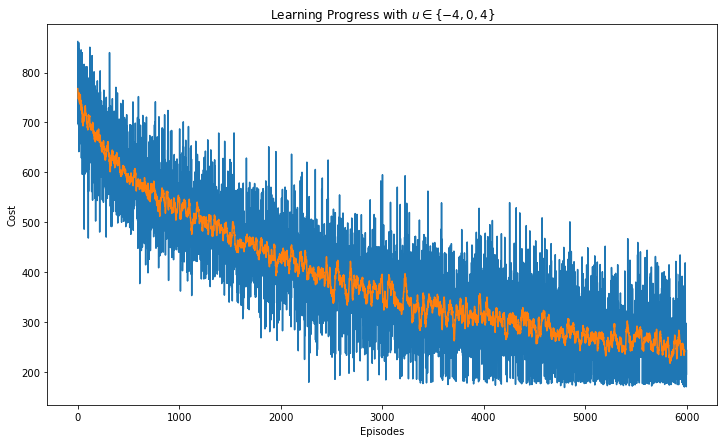

In [35]:
#Plotting the learning progress
#Plotting the learning progress
plt.figure(figsize=[12,7])
plt.plot(range(len(allCosts_1)),allCosts_1)
movingAve_1 = np.convolve(allCosts_1, np.ones(20)/20, mode='valid')
plt.title(r'Learning Progress with $u \in \{-4,0,4\}$')
plt.xlabel('Episodes')
plt.ylabel('Cost')
plt.plot(range(len(movingAve_1)),movingAve_1)
# plt.savefig('./outputs/LearningProgress_1.jpg',bbox_inches='tight', dpi=150)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAYWltZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzA5NSBiYWVlNDAwIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEz
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
ClhliIQAP//+92ifAptaQ3qA5JXFJdtPgf+rZ3B8j+kDAAADAACurHPopkgYXevGAAJuAAW7jOZC
ngmeACi53MuNkaMTE+Sb0Coh9ihFFR5ijlyUydMbatzIlUPbcC73WesKVK8XsgfFS6NmkLDNfmVC
kLLvoDkk+dpQFu+DXUKKbGrBAS3c+suvJ7D3SOIrm6MG2TI0XtVAWRWvaWC5B6fME4w+e9DVoDM0
StNDwSXXSKdBI19pY2tz/hMf+VF2bfiCD483UiVvl1cmgmwXpahDFTsYnu6FGk02/0Si4QBL0d5E
7SmccipY5/BzidEoaaE2xuYqf9nMKcCYkWgumi61ILGlZQserdPbGTfGiCyfeRCgos1xILxBfl4x
v2t6hrr5jqxK3Pl7TzvdBOT/Nn3N/HGHRgsWcIrMtLOoVMR5nTod9mZFAfW4Rb2LVyW0k+CY+yOO
uUOdff5nQNJ5/ACP3LTKKNPsAnCfHUgwDE1/DPvaRn15n4NN1w0e5R2rzuufrNxhMw951uHc1fR/
M/O11GUm68T3pjfMrlYblAdKUteNhXrPmosIXItSUasFmQ96UWNUWmcdA5dA0c1fgO0r4+CVtjNX
V1PUE/87/9lgM43NRS6PKgCfcAFqAAAeKG0XeDqO1ji2ujiwht8fudgVacuY4Dc9Pzy7INqNksJj
wv7eIpV6rg+NKn1niIYzLnX1VpbQRs5yfmZAqbvTnoRZbX96x6C2a7LTADj7GmMjVkOiYxURHj4N
tG4TPPRT1W8hCj2FKhRh1SR2VYhQXGvd+NGYqnhwucOd6W+XSZ/bIJ1Y6Pu/SWSFPWaRPLSJ5ymY
PyvC7Cwqo5BFya7lm73VbXthbAQ4hMz7J6V3QN60ttrGd4cwS4mzqUoazFDfcyWtpkMJ5+swCVAI
TS2lfmMxT4FK0maQ9LcNE2sfbWpwq/OP0hXa4fcvp2mQZUqX0+v7UrYup+jhTH/AAAADAACGU9E5
rrpCB0AM9epHDfWw10A+ToOHUzXPCoj7vsYu/FXbEfEc8bUyX6/t/+jtwqic4Qhm44a2QEvLnzyE
L2x01MUrIOBL2YvoCnZeRSxL9ETD2VT1Rh6nuBWilTmPQV50lj/vhtLwKz0aXLDXg+3RKVdz37gQ
LZSia3u5YF78FV8tflCZ0a3EnEt+PSR2M6gN8bE0lKFcpdE7RXsrEOriUpqDDKl5WTa6KSO8NXAX
6ZxpeoGoMZ/NvZM+GONmmD+SSGuqnA+09vsKGi5zTXEz6qZ3NJnWc0lkLcyXCaBzbi9/Rmchbp/W
tp3nx6dX8X9Sm0ivpaaLZV+hGQWy//wxYIfciXnWjLTI+mLho5TnXl/1tpM+numgt2jB34XDKVkl
7ie393IW2WUY0DS7dR9Z+R6/MvGkv8ziauQafaGFZc+t7c+KQAAK+AAAAwABocmsTp9Am3GNdRPv
SCayT7FoD/ul6f0NGpbvRWZt74q9zUfBH3/b+E6VusuvVateb2dheB/GPdL54zSGKcQ23I+QGtDs
Gfcvm//QzSdJfy2Bl+yhHB/1xZ9o55a2sk+k0RY4BFUy8beydQcvGm1MNkBzUI5JuXBIVPWxB3AL
sDr4Ao7MZuzqi3e+N+NKzlKtEK1RQJOYM2qMAGIc7SKL+zAzUcs63i6GT0pLc0WqOm0ZY0ccEH7g
VcRPY9jGOMQ3OZ2izK78Q/+KvyfFKAoMrv3xiAdtD7/Kyp2RyfCWpP3iKXhnxrYcXJUTfFuZFUdw
G05MRdf4Qw/Glo/69A21hhGZtXLBdJMC2DVit8fvlvDBYMv/r2iEokOGLSnwr3TdcR26A3+7ZzS0
EqkI7GHs+2LI+LCX41CHgLzZFYEragAAAwAAAwGxyh0r8ansMH7YWRMOIX2YeDLG3/0zjaneHbKW
3kng/oziYOYDQXGSThtgv1RoAkactUe6TndfiCRTOMnC9Lgxmspd3+R/yg2ZOt+Q/Y5qNstwPWyn
Yqa17bECZ/ashBXv6WantL0RVxMSIiZAVyJG8kgGT0z7p5+Sa1riYDWgEsEs1xwNdhbKZYKz22N7
8Scr0Q1sz1QFPCPMwJDKrcog//+ZU7o9hsh/GLtewv8F3sohhk9Ahe+Gx2zYRr2s9I0Qsue2xhmB
UxPfr4nDPTxTgBKNWiW5Pq4gY+tIK+Q8KoeQ3S1nvhpxB3OJF/K7tCzrn3FyY+ANDHslmaYxWxA3
Vy3QHRNMhzhtlkfP7p/k2sAVlUl/UWaMRiVRctZf06VHeU61LSbbnj27lGQbVr8qRVgIeoPJGJZU
kFuNNTYpUtr+bU/rld1U9Qnn/c/XLNvMyH1shzg+6mLTWRGbO7T6CGEYplcgg8FaIQksG/HIZuKJ
OYZLUqn9Wjx/rULRcl42ChOp1n/xI3ubTcTw36G5u1AbrOmMfez2uGL7j0BaFFawZnXFFcIEXHem
5bIbqIPgCtOfY1rhXD/FYzEPo8DOKWAioJ8a1/bYysQw16BeAZkmXFrrkl6GT9CnDh1eSqJOLKkA
r6P6YrqJXnzPHcp5gWZ6vaAVZlMx/CpBw6vJVEwilaKQiaIPLFDm7sQ5837K/vzrBJEnYqWjD/PW
I8akA77HiCO4MvQMu955cfwLgREzT93afBJ8P9lyFG1n5KrzcBwx7JEprF2iF/JSAMKfM0ZAUHvZ
CEjA7Ofybzp8ZvWZyjFaH/gAnoqHvpl98bdUE978iTp+PwDn+r3q5WjxTWPtG9cfp121ice4J3dL
+6Fbdyk1w/9LUyeprl/ProiJ7D3lvlllRIeeJLGdfh8JZMt01R/aQQ9wjxkfye6aX3Z4u6xGysXu
Z+u4ucjLHPbvEZmbEXrhlAH+2xDCqCxXWg9nc6Stbvn2zhxclQy1pXlTfzPI26bbKRynywjBJeXM
a+2QwFrIlu+4mJ46/zpcy

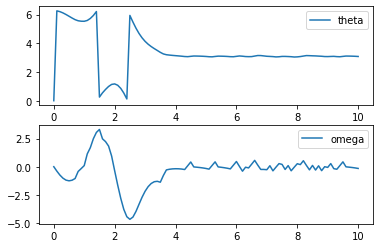

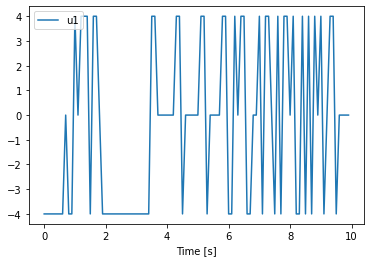

In [36]:
def controller(x):
    disc_x = get_discretized_index(x)
    possibleU = [-4,0,4]

    u = possibleU[policy_1[disc_x[0],disc_x[1]]]
    return u

T = 10.
x0 = np.array([0.,0.])
t, x, u = pendulum.simulate(x0, controller, T)



#Plotting the time evolution of the states and control
plt.figure()

plt.subplot(2,1,1)
plt.plot(t, x[0,:])
plt.legend(['theta'])

plt.subplot(2,1,2)
plt.plot(t, x[1,:])
plt.legend(['omega'])
# plt.savefig('./outputs/States_1.jpg',bbox_inches='tight', dpi=150)

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1'])
plt.xlabel('Time [s]')
# plt.savefig('./outputs/Controls_1.jpg',bbox_inches='tight', dpi=150)

pendulum.animate_robot(x)

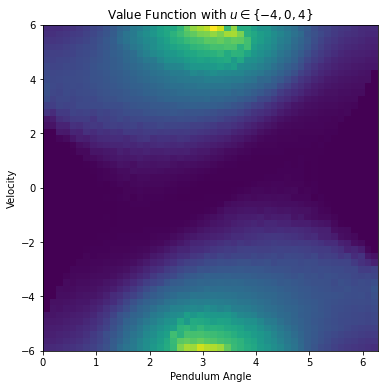

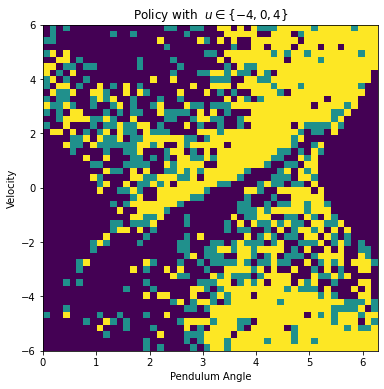

In [37]:
# we plot the value function
plt.figure(figsize=[6,6])
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title(r'Value Function with $u \in \{-4,0,4\}$')
plt.imshow(value_function_1, extent=[0., 2*np.pi, -6, 6], aspect='auto')
# plt.savefig('./outputs/Value_1.jpg',bbox_inches='tight', dpi=150)

# we plot the policy
plt.figure(figsize=[6,6])
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title(r'Policy with  $u \in \{-4,0,4\}$')
plt.imshow(policy_1, extent=[0., 2*np.pi, -6, 6], aspect='auto')
# plt.savefig('./outputs/Policy_1.jpg',bbox_inches='tight', dpi=150)


Now with $u \in \{-5,0,5\}$

In [38]:

def q_learning(q_table):

    epsilon = 0.1
    numEpisodes = 6000
    possibleU = [-5,0,5]
    learn_rate = 0.1
    discount_rate = 0.99 

    allCosts = []
    for episode in range(numEpisodes):

        #Initialise initial satte x0
        curr_x = np.array([0.,0.])
        cost_per_ep = 0
        
        for t in range(100):
            if (np.random.rand()<(epsilon)  and episode!=numEpisodes):
                # choose a random action
                idx_curr_action = np.random.randint(1,len(possibleU))
                currAction = possibleU[idx_curr_action] 
            else:
                #Best guess from q table 
                idx_curr_x = get_discretized_index(curr_x).astype(int)
                idx_curr_action = int(np.argmin(q_table[idx_curr_x[0],idx_curr_x[1],:], axis=0))
                currAction = possibleU[idx_curr_action] 

            #Oberserve x_n+1
            next_x = pendulum.get_next_state(curr_x,currAction) #Using the real state for getting next state (NOT discretized)
            idx_next_x = get_discretized_index(next_x).astype(int)
            idx_curr_x = get_discretized_index(curr_x).astype(int)

            #Update Q
            td_er = get_cost(next_x,currAction) + (discount_rate)*(q_table[idx_next_x[0],idx_next_x[1],:].min(axis=0)) - q_table[idx_curr_x[0],idx_curr_x[1],idx_curr_action]
            q_table[idx_curr_x[0],idx_curr_x[1],idx_curr_action] = q_table[idx_curr_x[0],idx_curr_x[1],idx_curr_action] + learn_rate*td_er
            
            #Set up next loop
            curr_x = next_x

            #Add cost of this time step
            cost_per_ep += get_cost(curr_x,currAction)

        #Append cost of this episode
        allCosts.append(cost_per_ep)
    return q_table,allCosts

In [39]:
q_table_2 = np.zeros((50,50,3))

q_table_2,allCosts_2 = q_learning(q_table_2)

value_function_2, policy_2 = get_policy_and_value_function(q_table_2)


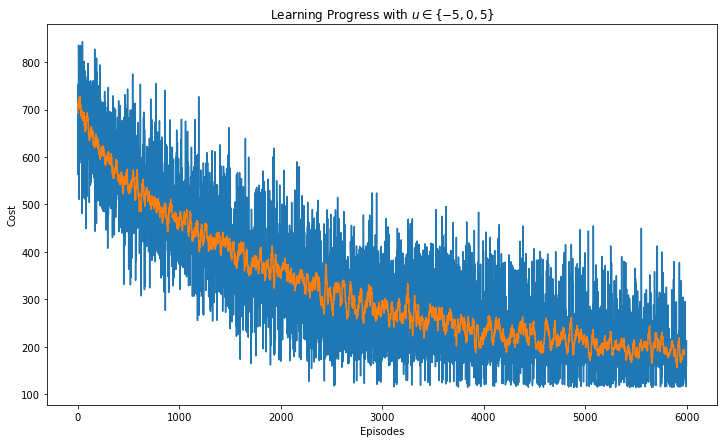

In [40]:
#Plotting the learning progress
plt.figure(figsize=[12,7])
plt.plot(range(len(allCosts_2)),allCosts_2)
movingAve_2 = np.convolve(allCosts_2, np.ones(20)/20, mode='valid')
plt.title(r'Learning Progress with $u \in \{-5,0,5\}$')
plt.xlabel('Episodes')
plt.ylabel('Cost')
plt.plot(range(len(movingAve_2)),movingAve_2)
# plt.savefig('./outputs/LearningProgress_2.jpg',bbox_inches='tight', dpi=150)


<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAWLdtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzA5NSBiYWVlNDAwIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEz
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
CjBliIQAEP/+94G/MstfIrrJcfnnfSyszzzkPHJdia640AAAAwAM3Yie4PCtdD0V4AAgIABROR5k
KeCv4AGz4VOkSYfE9/DDcEZJXM0JBPgUHqcf+MJV8grbj/6CexNDmqakcJVX5LNn/k270QPljHwx
9jwXs3gaQbRm/L0Ml4F1FbxUdNSpSASbFyyoQiZ6ZdrBsVWkRS4/chXHpJ6DHeaVz02Ec0DQh56E
StpHAFQVab1W55SS98WEB9whrLov2QzXfwZFL3Nol1IZ9wekoQA4r7/Ebz108+t/JmZ2gU2Zkm/j
Wb4XDYIUvfo8EvJLgxZseCMqDDN42gNNzhf7aIvO3Mzp4IIIkZYiBJLyar+TgShIJEEmW8Rxg4FK
eVzdoX5eJJ+LQmiRNse+WOk/CIP8UXSGi16JJ0hBnFKwsWcIrMtLOovxx5nTod9mZFAfW4Mall0W
5zSBxpEFryunyXjGYxrayBjBii2/U4V9Tr37rA+yGTsqd/rSiD4afp3JqL92G2BTBpp2H/MzjhgH
aS1S/18RJkmG8JUiMM4Nr4yysyqQT7S2I3U8nuoMScZwblvN1qkpQ1Gh2wBeh3PFA99aWXvg+eFi
LoAAACBBD9zZfOaYKbk/q6/8Vr81orBcwvLUB+Fqbt3+/SK3P+R4aLqL03efHripmg3Xor3W537r
HBMdSbtBzLX3M2pYUIstsUl5jd4zzRaw0SGgoOTtKoyir8Iu2ooyxQkKXcdZvEqBvBjr3gwpWFPK
ABCguNe78aMxVPDhc4c70t8ukz+2QRa7QqD7Edvw4LWfUbokSeU8PheyzD/SyOwruHeaLpcORL+3
9iZN001TfXdnMOOOZtt4vzAEBlu3HLNHuZNyHbGu0RPByQuuYQWVe3jwUOdTQS7Kex1y5OMtxIPL
/B2CVlKg6AU0hEloZdDvtAm80AIHMXK2cwAAAwAAEv/jJk0DFrLMghE3uRWv4tg6KppiaTOAioWu
3FLDyhaHY86AaRx7vQXSf0AbpXLjK2Y2D3PQUMD54cpNOsTtTFKyDgS9mpetf7HFn7e8P64dQ/30
8vfLkxTVamFzBxnw30dc2l4FZKKmcgMNiXbspPvjdYe/IYOAgw1YYHJYyr0eChM6NbiTiW/HuJ6k
HQBVXoQSlCuUuidor2Vh8aEP2xfYTn6bzNrFKfa+VWyzBRYZ2bxIUrRE9T0WNEG7ih0wN/ptNX8z
DxNJ99rnlo1HO8deM7BBBOThMqlphNh6LkUVoMETIFIBjo34fM6+gLzAnVFt3vlsbux5zEWbkcQc
UJZGJVWPUFVn0ejSTvyf6a+QQxSR4Rhtwo3AcDgOQLbT+oO5WFv9Y5CRXCsJSyotO60y1uuG8kGl
3dpX105YgqgD3aPtvUfQ1zTWiAAAAwAOYjKHtK5ZyBPjjGMJ8P+2s16Y//Rm/3s62tbPWq5rGRXw
XuMg+Yv5vROocbqyZ4D04lKJiFk5MaGWmarARSEBVw4emAlgZ+Zf//7PzVTKCfDNnn+wcH/XFn2j
nlrayT7JfixwCKpl429k58EFetBlxsnor1eixzqQqetiDuAXYHXwhR2YzdnVFu98bpq0XfsQlb47
sYGWaoM/CBENB2y/NupcHpQ63i6GT0pLbOzxJ5Ma3D77W1xFHC3kWGfc1dgG5zO0WZXfiH/xOulE
i/lB27+owpwHplQ5XSTwcsMqPtbStzfB91g7tqAshNBowMJnlIPPPvCeKZsdIaxNh/4gikrEp+Y1
CWDMPtlEuq8SOZyEtp6eX7u5qjYv+XONyEqHvhMZtaYCKlUfWL+T72Ax4FEnBT1V7/iH4QAC1FTv
ACPjkY60QvxjCiAKCXZk67ugEQgp48uLvXtB7jFCbODNtX9pR5WIWEWBusvJdVaeAw2xQf2JKiqr
8m1yKI477G9WiPznsk+4P5LSQin6ayl3Y7j+flAC2MXqtJi73tTEqE82r4YnEFo2hdkcIK9/SzU9
peiLNd0RETICuRI3kkF6/MhW9MZ1OCC8xqvCxd5TfIS3O4NO4l6ssgarNxHB1R6cz/nTt+IMsT91
t5P//+Gv0Q9hsh/GLtewwgnfZMVhRDul74bHbEPUgLT8tq5/skhNz6kbkcxJfGKXJ1ojaFAFQFmX
Eoy+KGdIABAKnXqlRuTmdfMsweqncRcn2xZW25bJETDLtnf54HZekOfTZyQyJAp3cbkd2Qv9Cw7V
zcFOk7HsBVVagQ/74s5YYZ1YHrRo8QC75cpMas79QgGsDQsgdrhhM+LqAezFGTGQFZuyML/TB4+p
0dxgAAJyDE/th+ldP5lFDcIGMPKzPU6dF7feLDcHW6Hoch/B5NV8lWJO0Six3gJMcKhZ/8SN8PEn
v130oSdep1qP5RZnoMnCsz6T2kapkrP/iRu5EF5Yi/xwqwMshhJYk7uYc+xrXCuIc+tR4+TNc4pY
CKgtNcyS7bIXCZBhr0C8AzJMromDpl8yI1B4s26w/is7T7bynZnuLBru7b/D0C8AzJMuGQGEdWSR
qDxZt1h/Fay27MTybUaZkOALc+DD9Hc8pWc+0epT1NfWpkbv6+8YsrLqXZ/AfoPIkVhurku33DER
eaq9kB8PKMe9JixexcBZX9wNS/p944CKiRrTaIe0V0ogmktjwYYO53Yq0ENu2gWXozToSbPJAEIB
osS5dOuzIUe7UHH97mZU0J7DnA7Ya+TVP6AXtG5LHQ3S2KiWNlVMGrE3WuwIwYv3LQrzQVBzgt4s
5ffMUIjvnai4TeK0WA2W3Sml92dLyvGnS7SFCkWjORljnqVkQ/yHexkjitAIUM+XKy/bQezudJWt
3z8n+I/JGJM3rGpv8AbU6Q1Qu8p8sIwPsRsWvtkMBayJdGrABwqmOnnitZxxpI6+/NQGVJHULBTV
hzByaZ8lKBVgT+25EV5sR

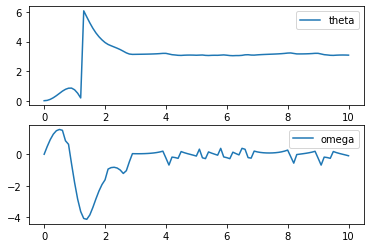

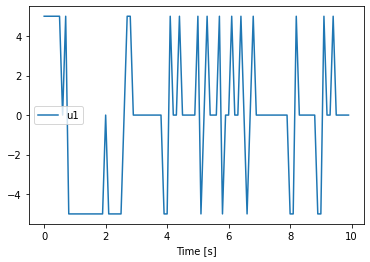

In [41]:
def controller(x):
    disc_x = get_discretized_index(x)
    possibleU = [-5,0,5]

    u = possibleU[policy_2[disc_x[0],disc_x[1]]]
    return u

T = 10.
x0 = np.array([0.,0.])
t, x, u = pendulum.simulate(x0, controller, T)



#Plotting the time evolution of the states and control
plt.figure()

plt.subplot(2,1,1)
plt.plot(t, x[0,:])
plt.legend(['theta'])

plt.subplot(2,1,2)
plt.plot(t, x[1,:])
plt.legend(['omega'])
# plt.savefig('./outputs/States_2.jpg',bbox_inches='tight', dpi=150)

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1'])
plt.xlabel('Time [s]')
# plt.savefig('./outputs/Controls_2.jpg',bbox_inches='tight', dpi=150)

pendulum.animate_robot(x)

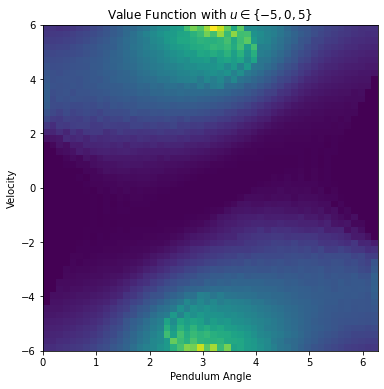

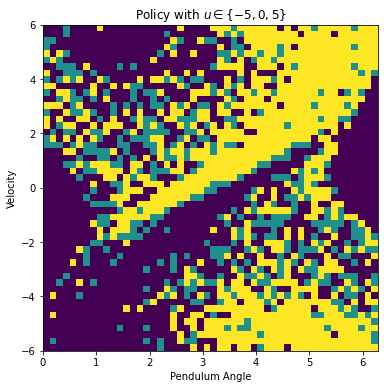

In [42]:
# we plot the value function
plt.figure(figsize=[6,6])
plt.title(r'Value Function with $u \in \{-5,0,5\}$')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.imshow(value_function_2, extent=[0., 2*np.pi, -6, 6], aspect='auto')
# plt.savefig('./outputs/Value_2.jpg',bbox_inches='tight', dpi=150)



# we plot the policy
plt.figure(figsize=[6,6])
plt.title(r'Policy with $u \in \{-5,0,5\}$')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.imshow(policy_2, extent=[0., 2*np.pi, -6, 6], aspect='auto')
# plt.savefig('./outputs/Policy_2.jpg',bbox_inches='tight', dpi=150)


Question 9. \
How is learning affected when changing $\epsilon$ and the learning rate? Why?


\
Written answer to this part is detailed in the report.